# USA Housing datatset
------------
**Description**:

USA-Housing-Dataset. Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. 

**Attributes**:<br>

Avg. Area Income<br>
Avg. Area House Age<br>
Avg. Area Number of Rooms<br>
Avg. Area Number of Bedrooms<br>
Area Population<br>
Price<br>
Address<br>

 **Target Column**: Price
 
 **Type**: Distributional Problem


## Imports
**Import pandas, numpy, matplotlib,and seaborn.Then set %matplotlib inline**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

In [22]:
df = pd.read_csv('USA_Housing.csv')

**Check the head of dataframe, and check out its info() and describe() methods.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Check for null values

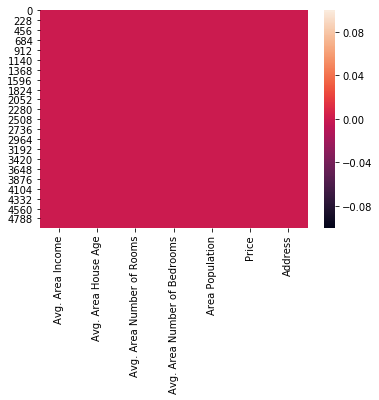

In [6]:
sns.heatmap(df.isnull())

# Handle Co-Relation

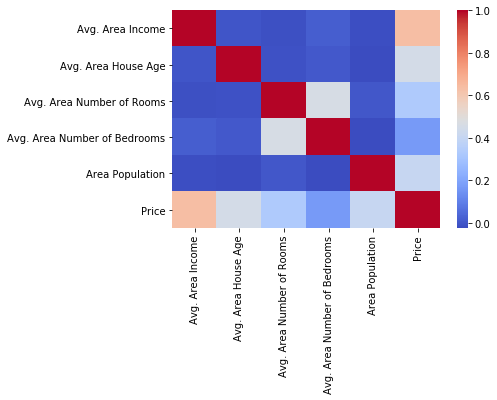

In [8]:
sns.heatmap(df.corr(),cmap='coolwarm')

    Avg area of bedrooms & Avg. area of rooms both are equally coreraled to Price. So we will drop one column 
    based on corelation
    Address Column has no co-relation with Target Column(Price)

In [23]:
df.drop(['Address','Avg. Area Number of Bedrooms'] , axis = 1 , inplace = True)

In [24]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


## Standard Scaling


In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [16]:
scaled_array = ss.fit_transform(df.drop('Price', axis = 1))

In [17]:
X = pd.DataFrame(data = scaled_array , columns = df.columns[:-1])

In [20]:
y = df['Price']

C:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


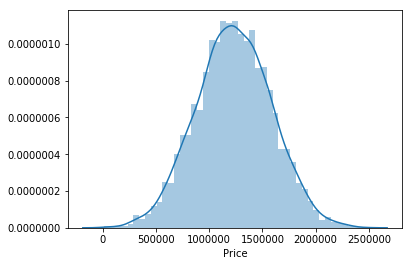

In [25]:
# to get mean value of Price: for distribution we plot distplot
# for category we plot countplot

sns.distplot(df['Price'])

# Training and Testing Data

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(scaled_array,df['Price'],test_size=0.3)

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
ypred  = lr.predict(X_test)

In [37]:
lr.coef_

array([229099.8937001 , 165791.90278604, 121049.9268702 ,   2542.60256717,
       149872.52127297])

In [38]:
df_coef = pd.DataFrame(data = lr.coef_ , columns = ['Coefficent'] , index = X.columns )

In [39]:
df_coef

,Coefficent
Avg. Area Income,229099.893700
Avg. Area House Age,165791.902786
Avg. Area Number of Rooms,121049.926870
Avg. Area Number of Bedrooms,2542.602567
Area Population,149872.521273


In [40]:
ypred

array([1068529.07908083, 1443734.77014109,  710422.51389387, ...,
       1404769.9367752 ,  838173.46912346, 1236538.41974546])

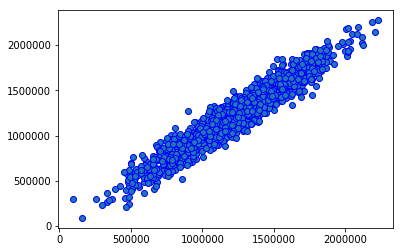

In [41]:
plt.scatter(ypred , y_test , edgecolors= 'b')

(array([  5.,  38., 104., 311., 377., 364., 203.,  82.,  14.,   2.]),
 array([-337712.51553857, -267435.63228094, -197158.74902331,
        -126881.86576569,  -56604.98250806,   13671.90074957,
          83948.7840072 ,  154225.66726483,  224502.55052246,
         294779.43378009,  365056.31703771]),
 <a list of 10 Patch objects>)

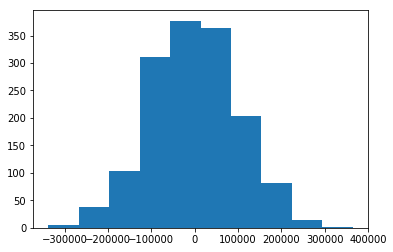

In [42]:
plt.hist( y_test - ypred )

**Analyze mean error predicted**

In [45]:
from sklearn import metrics

In [46]:
metrics.mean_absolute_error(y_test , ypred)

81057.98432651434